# Quicklook Trigger Data

So you're interested in using the trigger data (TRIGDAT)?  You must be a glutton for punishment!

In all seriousness, TRIGDAT was designed so that it contains the minimum amount of data required for rapid on-ground characterization and localization of triggers. To that purpose, the TRGIDAT contains 8-channel pre-binned lightcurve data for each of the 14 detectors along with spacecraft position and attitude information for each bin.  The lightcurve data, though, has multiple resolutions.  There are "background" time bins of duration 8.124 s from the start of the trigger data to just before trigger time, and then about 50 s after the trigger time through the rest of the data.  In between the two segments of "background" bins, there are 1.024 s duration bins, and in a very short window around the trigger time, there are overlapping bins of width 256 and 64 ms.  This design enables a preliminary rapid analysis for long duration triggers that can last from several tens of seconds down sub-second duration triggers. The fact that the different bin timescales are overlapping creates difficulty if you want to make lightcurve plots, but the ```Trigdat``` class solves this problem for you.

Let's open a TRIGDAT file

In [1]:
from gbm import test_data_dir
from gbm.data import Trigdat

trigdat = Trigdat.open(test_data_dir+'/glg_trigdat_all_bn170101116_v01.fit')
print(trigdat)
print(trigdat.trigtime)

glg_trigdat_all_bn170101116_v01.fit
504931642.867272


There is a *ton* of metadata and extensions related to how the trigger was processed onboard the spacecraft: the trigger timescale and rates in each detector, the simple background rates that are used onboard the spacecraft, and the onboard trigger classification and localization information.  We really won't delve into all of that other than to point out that it exists and is accessible through the ```Trigdat``` attributes and methods.  As for the extensions:

In [2]:
trigdat.headers.keys()

odict_keys(['PRIMARY', 'TRIGRATE', 'BCKRATES', 'OB_CALC', 'MAXRATES', 'EVNTRATE'])

The pertinent data we want to use is in the 'EVNTRATE' extension.  Since this contains the 8-channel lightcurve for each of the detectors, we can extract the data for a detector and return it as a CTIME-like ```PHAII``` object:

In [3]:
# data for NaI 0
phaii = trigdat.to_ctime('n0')
type(phaii)

gbm.data.phaii.Ctime

Once extracted, it has the full capabilities of the [```Ctime```](./PhaiiData.ipynb) class.  You can also retrieve the sum of the detectors:

In [4]:
# the triggered detectors
trig_dets = trigdat.triggered_detectors
print(trig_dets)

# sum the triggered detectors
summed_phaii = trigdat.sum_detectors(trig_dets)

['n9', 'na', 'nb']


And then you can plot the lightcurve using our now-familiar ```Lightcurve``` class

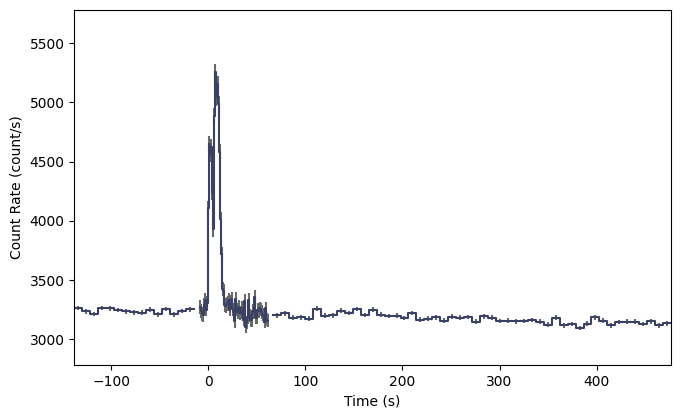

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from gbm.plot import Lightcurve

lcplot = Lightcurve(data=summed_phaii.to_lightcurve())

From the plot you can easily see where the 8 s timescale changes to the 1 s timescale and then back to the 8 s timescale. By default, you can retrieve the 8-s and 1-s data for the lightcurve, but what if you want to retrieve the 256 ms or 64 ms timescales?  You can do that by giving ```trigdat.to_ctime()``` or ```trigdat.sum_detectors()``` a ```timescale``` keyword:

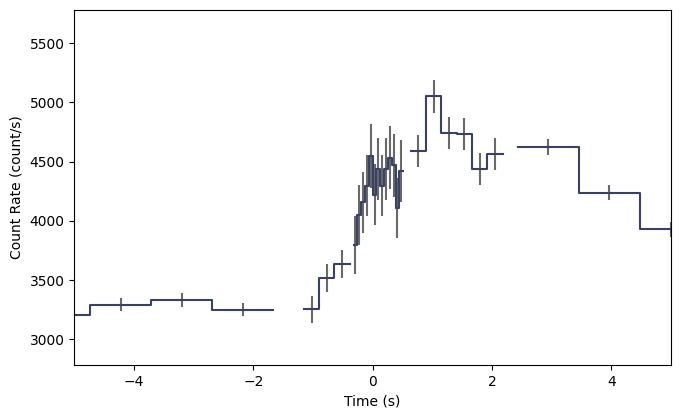

In [6]:
# retrieve all timescales 64 ms up to 8 s
# possible options for timescale is 64, 256, or 1024
summed_phaii = trigdat.sum_detectors(trig_dets, timescale=64)

lcplot = Lightcurve(data=summed_phaii.to_lightcurve())
# zoom in
lcplot.xlim = (-5.0, 5.0)

As you can see, all timescales are now plotted and merged into a single lightcurve.  The 64 ms option will return all timescales at >= 64 ms, while the 256 ms option will return all timescales >= 256 ms.  This lightcurve doesn't look particularly pretty because it's a long-duration GRB, but short GRBs show up very nicely on the 64 and 256 ms timescales.

As mentioned earlier, TRIGDAT also contains spacecraft position history and attitude information.  This means that *nearly* everything you can do with [```PosHist```](./PositionHistory.ipynb) can also be done with ```Trigdat```.  For example, we can determine where the detectors were pointing at the time of the trigger:

In [7]:
# NaI 9 pointing (one of the triggered detectors) at the trigger time
trigdat.detector_pointing('n9', trigdat.trigtime)

(array(68.87778267), array(17.76359436))

And of course we can make plots with this info!

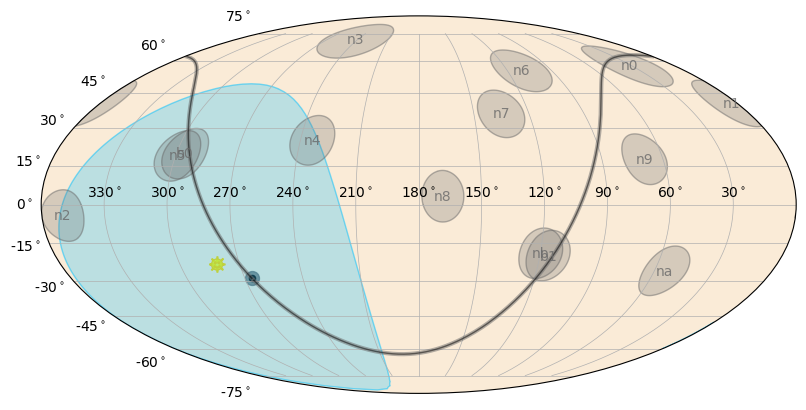

In [8]:
#  a sky plot of the detector pointings and Earth blockage
from gbm.plot import SkyPlot

skyplot = SkyPlot()
skyplot.add_poshist(trigdat)

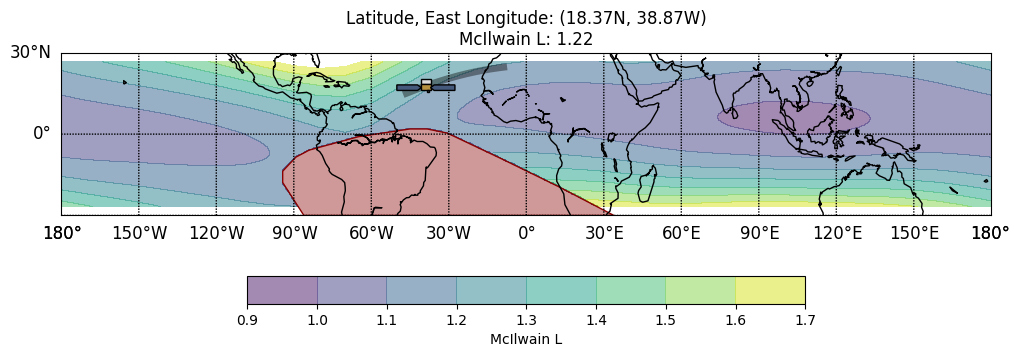

In [9]:
# and we can plot where Fermi is in orbit
from gbm.plot import EarthPlot

earthplot = EarthPlot()
earthplot.add_poshist(trigdat)
earthplot.standard_title()

Congratulations, you've completed the abbreviated lesson on trigger data! Onward to the GBM [skymaps](./Skymaps.ipynb).